### Black Jack Games 
#### Game Play :

* Create a deck of 52 cards
* Shuffle the deck
* Ask the Player for their bet
* Make sure that the Player's bet does not exceed their available chips
* Deal two cards to the Dealer and two cards to the Player
* Show only one of the Dealer's cards, the other remains hidden
* Show both of the Player's cards
* Ask the Player if they wish to Hit, and take another card
* If the Player's hand doesn't Bust (go over 21), ask if they'd like to Hit again.
* If a Player Stands, play the Dealer's hand. The dealer will always Hit until the Dealer's value meets or exceeds 17
* Determine the winner and adjust the Player's chips accordingly
* Ask the Player if they'd like to play again

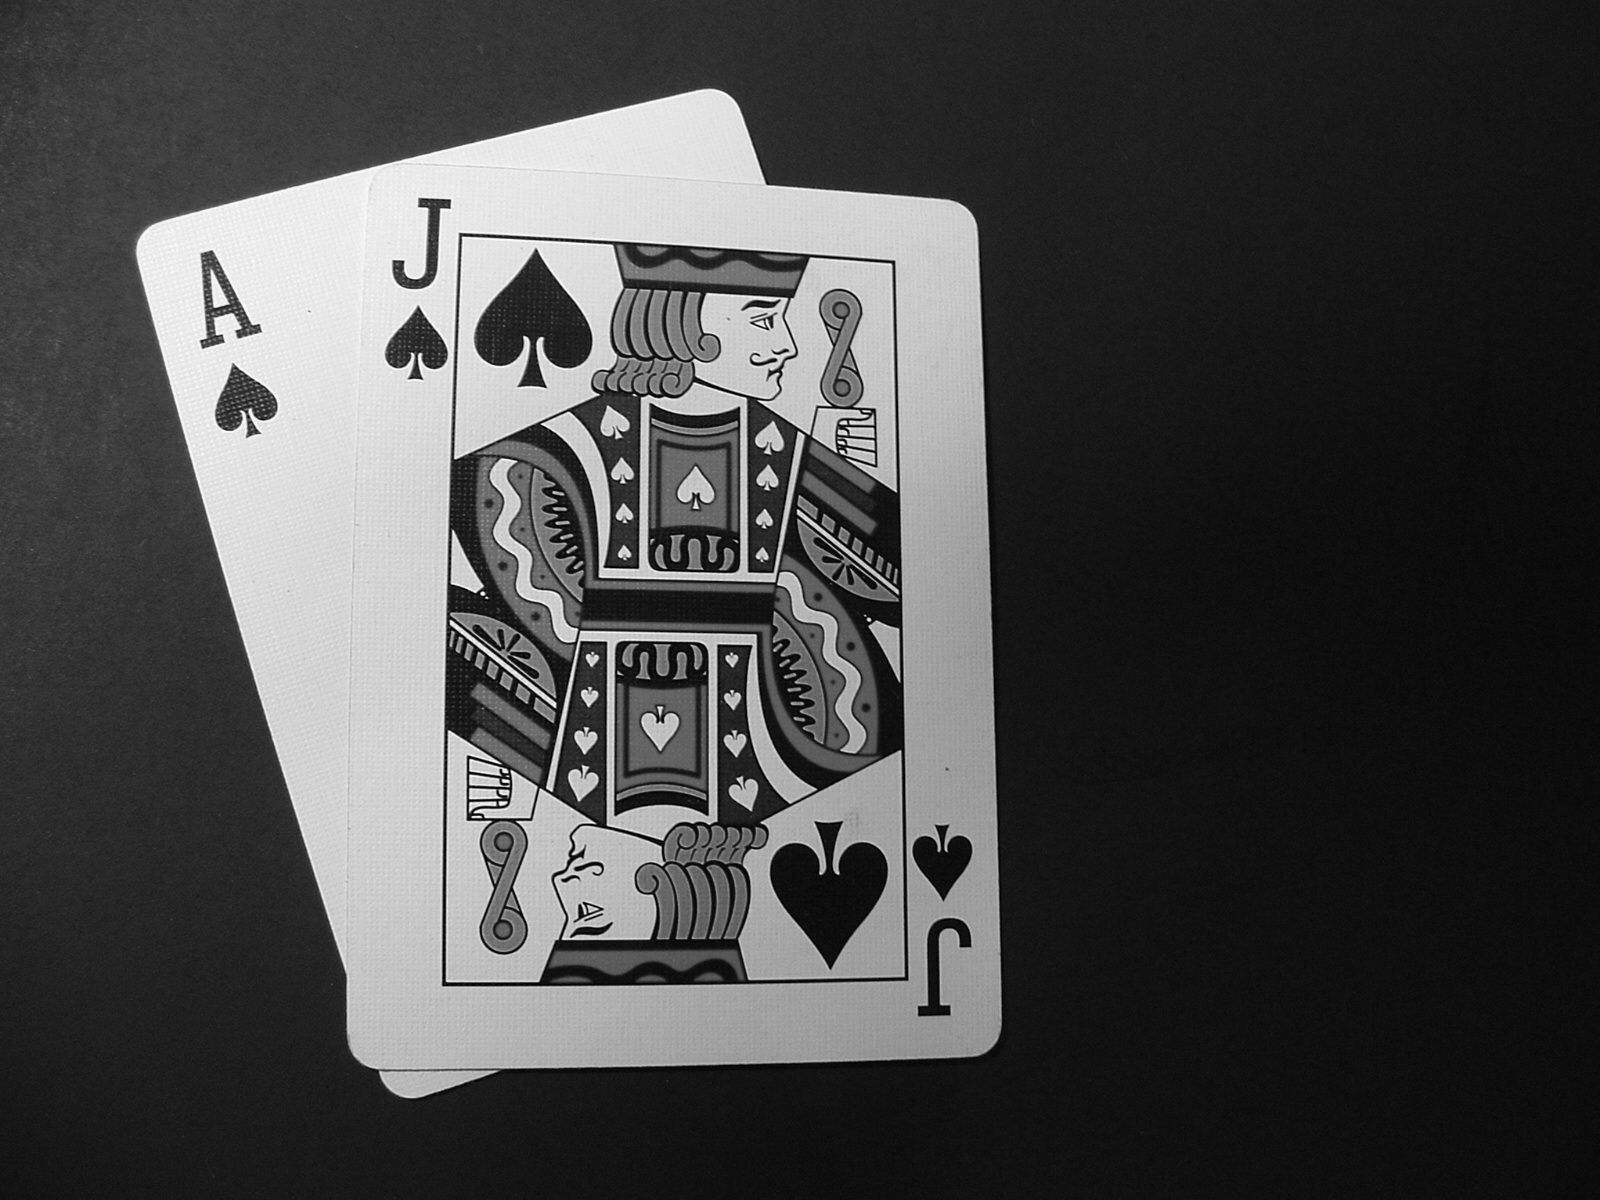

In [1]:
import random

suits = ('Hearts', 'Diamonds', 'Spades', 'Clubs')
ranks = ('Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'Jack', 'Queen', 'King', 'Ace')
values = {'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 'Nine':9, 'Ten':10, 'Jack':10,
         'Queen':10, 'King':10, 'Ace':11}

playing = True

In [2]:
class Card:
    
    def __init__(self,suit,rank):
        self.suit = suit
        self.rank = rank
    
    def __str__(self):
        return self.rank + " of " + self.suit

In [3]:
class Deck: 
    
    def __init__(self):
        self.deck = []
        for suit in suits:
            for rank in ranks:
                self.deck.append(Card(suit,rank))
    
    def __str__(self):
        deck_comp = ''  # start with an empty string
        for card in self.deck:
            deck_comp += '\n '+ card.__str__() # add each Card object's print string
        return 'The deck has:' + deck_comp

    def shuffle(self):
        random.shuffle(self.deck)
        
    def deal(self):
        single_card = self.deck.pop()
        return single_card

In [4]:
test_deck = Deck()
print(test_deck)

The deck has:
 Two of Hearts
 Three of Hearts
 Four of Hearts
 Five of Hearts
 Six of Hearts
 Seven of Hearts
 Eight of Hearts
 Nine of Hearts
 Ten of Hearts
 Jack of Hearts
 Queen of Hearts
 King of Hearts
 Ace of Hearts
 Two of Diamonds
 Three of Diamonds
 Four of Diamonds
 Five of Diamonds
 Six of Diamonds
 Seven of Diamonds
 Eight of Diamonds
 Nine of Diamonds
 Ten of Diamonds
 Jack of Diamonds
 Queen of Diamonds
 King of Diamonds
 Ace of Diamonds
 Two of Spades
 Three of Spades
 Four of Spades
 Five of Spades
 Six of Spades
 Seven of Spades
 Eight of Spades
 Nine of Spades
 Ten of Spades
 Jack of Spades
 Queen of Spades
 King of Spades
 Ace of Spades
 Two of Clubs
 Three of Clubs
 Four of Clubs
 Five of Clubs
 Six of Clubs
 Seven of Clubs
 Eight of Clubs
 Nine of Clubs
 Ten of Clubs
 Jack of Clubs
 Queen of Clubs
 King of Clubs
 Ace of Clubs


In [5]:
class Hand:
    
    def __init__(self):
        self.cards = []  # start with an empty list as we did in the Deck class
        self.value = 0   # start with zero value
        self.aces = 0    # add an attribute to keep track of aces
    
    def add_card(self,card):
        self.cards.append(card)
        self.value += values[card.rank]
        if card.rank == 'Ace':
            self.aces += 1 # add to self.aces
    
    def adjust_for_ace(self):
        while self.value > 21 and self.aces:  #adjusting aces value from 11 to 1
            self.value -= 10
            self.aces -= 1
            

In [6]:
test_deck = Deck()
test_deck.shuffle()
test_player = Hand()
test_player.add_card(test_deck.deal())
test_player.add_card(test_deck.deal())
test_player.value

13

In [7]:
for card in test_player.cards:
    print(card)

King of Clubs
Three of Hearts


In [8]:
class Chips: 
    
    def __init__(self):
        self.total = 100 # default value whenever starts the game
        self.bet = 0 #initial bet 
        
    def win_bet (self):
        self.total += self.bet
    
    def lose_bet(self):
        self.total -= self.bet

In [9]:
def take_bet(chips):
    
    while True:
        try:
            chips.bet = int(input('How many chips would you like to bet? '))
        except ValueError:
            print("Sorry, a bet must be integer")
        else:
            if chips.bet > chips.total:
                print("sorry, your bet can't exceed", chips.total)
            else:
                break
            

In [10]:
def hit(deck,hand):
    
    hand.add_card(deck.deal())
    hand.adjust_for_ace()

In [11]:
def hit_or_stand(deck,hand):
    global playing  # to control an upcoming while loop
    
    while True:
        x = input("Would you like to Hit or Stand? Enter 'h' or 's' ")
        
        if x[0].lower() == 'h':
            hit(deck,hand)  # hit() function defined above

        elif x[0].lower() == 's':
            print("Player stands. Dealer is playing.")
            playing = False

        else:
            print("Sorry, please try again.")
            continue
        break

In [12]:
def show_some(player,dealer):
    print("\nDealer's Hand:")
    print(" <card hidden>")
    print('',dealer.cards[1])  
    print("\nPlayer's Hand:", *player.cards, sep='\n ')
    
def show_all(player,dealer):
    print("\nDealer's Hand:", *dealer.cards, sep='\n ')
    print("Dealer's Hand =",dealer.value)
    print("\nPlayer's Hand:", *player.cards, sep='\n ')
    print("Player's Hand =",player.value)
    

In [13]:
def player_busts(player,dealer,chips):
    print("Player busts!")
    chips.lose_bet()

def player_wins(player,dealer,chips):
    print("Player wins!")
    chips.win_bet()

def dealer_busts(player,dealer,chips):
    print("Dealer busts!")
    chips.win_bet()
    
def dealer_wins(player,dealer,chips):
    print("Dealer wins!")
    chips.lose_bet()
    
def push(player,dealer):
    print("Dealer and Player tie! It's a push.")


In [ ]:
while True:
    # Print an opening statement
    print('Welcome to BlackJack! Get as close to 21 as you can without going over!\n\
    Dealer hits until she reaches 17. Aces count as 1 or 11.')
    
    # Create & shuffle the deck, deal two cards to each player
    deck = Deck()
    deck.shuffle()
    
    player_hand = Hand()
    player_hand.add_card(deck.deal())
    player_hand.add_card(deck.deal())
    
    dealer_hand = Hand()
    dealer_hand.add_card(deck.deal())
    dealer_hand.add_card(deck.deal())
            
    # Set up the Player's chips
    player_chips = Chips()  # remember the default value is 100    
    
    # Prompt the Player for their bet
    take_bet(player_chips)
    
    # Show cards (but keep one dealer card hidden)
    show_some(player_hand,dealer_hand)
    
    while playing:  # recall this variable from our hit_or_stand function
        
        # Prompt for Player to Hit or Stand
        hit_or_stand(deck,player_hand) 
        
        # Show cards (but keep one dealer card hidden)
        show_some(player_hand,dealer_hand)  
        
        # If player's hand exceeds 21, run player_busts() and break out of loop
        if player_hand.value > 21:
            player_busts(player_hand,dealer_hand,player_chips)
            break        


    # If Player hasn't busted, play Dealer's hand until Dealer reaches 17 
    if player_hand.value <= 21:
        
        while dealer_hand.value < 17:
            hit(deck,dealer_hand)    
    
        # Show all cards
        show_all(player_hand,dealer_hand)
        
        # Run different winning scenarios
        if dealer_hand.value > 21:
            dealer_busts(player_hand,dealer_hand,player_chips)

        elif dealer_hand.value > player_hand.value:
            dealer_wins(player_hand,dealer_hand,player_chips)

        elif dealer_hand.value < player_hand.value:
            player_wins(player_hand,dealer_hand,player_chips)

        else:
            push(player_hand,dealer_hand)        
    
    # Inform Player of their chips total 
    print("\nPlayer's winnings stand at",player_chips.total)
    
    # Ask to play again
    new_game = input("Would you like to play another hand? Enter 'y' or 'n' ")
    
    if new_game[0].lower()=='y':
        playing=True
        continue
    else:
        print("Thanks for playing!")
        break

Welcome to BlackJack! Get as close to 21 as you can without going over!
    Dealer hits until she reaches 17. Aces count as 1 or 11.
How many chips would you like to bet? 90

Dealer's Hand:
 <card hidden>
 Queen of Diamonds

Player's Hand:
 Six of Diamonds
 Three of Hearts
Would you like to Hit or Stand? Enter 'h' or 's' h

Dealer's Hand:
 <card hidden>
 Queen of Diamonds

Player's Hand:
 Six of Diamonds
 Three of Hearts
 Ten of Spades
Would you like to Hit or Stand? Enter 'h' or 's' h

Dealer's Hand:
 <card hidden>
 Queen of Diamonds

Player's Hand:
 Six of Diamonds
 Three of Hearts
 Ten of Spades
 Eight of Spades
Player busts!

Player's winnings stand at 10
Would you like to play another hand? Enter 'y' or 'n' y
Welcome to BlackJack! Get as close to 21 as you can without going over!
    Dealer hits until she reaches 17. Aces count as 1 or 11.
How many chips would you like to bet? 10

Dealer's Hand:
 <card hidden>
 Two of Diamonds

Player's Hand:
 Six of Hearts
 Six of Diamonds
Would 